# Assignment IV: Dataset Engineering

Gabriel C. Trahan - C00058009 - 5 May 2025

### Contents

* [I: Ablation](#part-i-ablation)
    * [Dataset](#dataset)
    * [Classifier](#classifier)
    * [Experiment](#experiment)
    * [Results](#results)
* [II: Pattern Analyses](#part-ii-pattern-analyses)

---

# Part I: Ablation

## Dataset

In [189]:
"""Define dataset initialization method."""

from matplotlib.pyplot  import figure, grid, scatter, show, subplot, title, xlabel, ylabel
from numpy              import ndarray
from sklearn.datasets   import make_moons

class Dataset():
    """# Custom Moons dataset."""
    
    def __init__(self,
        n_samples_train:    int,
        train_noise:        float,
        n_samples_test:     int,
        test_noise:         float
    ):
        """# Initialize train & test datasets.

        ## Args:
            * n_samples_train   (int):      Number of samples in train set.
            * train_noise       (float):    Train set noise level.
            * n_samples_test    (int):      Number of samples in test set.
            * test_noise        (float):    Test set noise level.
        """
        # Define noise levels.
        self._train_noise_: float =                     train_noise
        self._test_noise_:  float =                     test_noise
        
        # Initialize train set.
        self._train_samples_, self._train_targets_ =    make_moons(n_samples = n_samples_train, noise = train_noise)
        
        # Initialize test set.
        self._test_samples_, self._test_targets_ =      make_moons(n_samples = n_samples_test, noise = test_noise)
        
    def train_set(self) -> tuple[ndarray, ndarray]:
        """# Provide train samples & targets.

        ## Returns:
            * tuple[ndarray, ndarray]:  Training samples and target.
        """
        # Return samples and targets.
        return self._train_samples_, self._train_targets_
    
    def test_set(self) -> tuple[ndarray, ndarray]:
        """# Provide test samples & targets.

        ## Returns:
            * tuple[ndarray, ndarray]:  Testing samples and target.
        """
        # Return samples and targets.
        return self._test_samples_, self._test_targets_
    
    def plot(self) -> None:
        """# Plot train & test datasets."""
        # Initialize figure.
        figure(figsize = (12, 5))
        
        # Subplot 1: Train.
        subplot(1, 2, 1)
        
        # Create scatter plot of train set.
        scatter(self._train_samples_[:, 0][self._train_targets_ == 0], self._train_samples_[:, 1][self._train_targets_ == 0], marker = "+", c = "red")
        scatter(self._train_samples_[:, 0][self._train_targets_ == 1], self._train_samples_[:, 1][self._train_targets_ == 1], marker = "o", c = "blue")

        # Label features.
        xlabel("$x_0$", fontsize = 20)
        ylabel("$x_1$", fontsize = 20)
        
        # Display grid.
        grid(visible = True)
        
        # Set title.
        title(f"Train Set (N = {len(self._train_samples_)}, Noise = {self._train_noise_})")
        
        # Subplot 2: Test.
        subplot(1, 2, 2)
        
        # Create scatter plot of test set.
        scatter(self._test_samples_[:, 0][self._test_targets_ == 0], self._test_samples_[:, 1][self._test_targets_ == 0], marker = "+", c = "red")
        scatter(self._test_samples_[:, 0][self._test_targets_ == 1], self._test_samples_[:, 1][self._test_targets_ == 1], marker = "o", c = "blue")
        
        # Label features.
        xlabel("$x_0$", fontsize = 20)
        ylabel("$x_1$", fontsize = 20)
        
        # Display grid.
        grid(visible = True)
        
        # Set title.
        title(f"Test Set (N = {len(self._test_samples_)}, Noise = {self._test_noise_})")
        
        # Display plots.
        show()
        
# Sanity test.
# Dataset(10000, 0.2, 50, 0.0).plot()

---

## Classifier

According to assignment instructions, this submission must utilize an SVM for experiments (ULID ends with a 9). By choice, this submission will specifically utilize a Non-Linear SVM.

In [190]:
"""Define Non-Linear SVM classifier."""

from numpy              import ndarray
from sklearn.metrics    import accuracy_score
from sklearn.svm        import SVC

class Classifier(SVC):
    """# Custom Non-Linear SVM classifier class."""
    
    def __init__(self,
        kernel: str =   "rbf",
        C:      int =   1
    ):
        """# Initialize Non-Linear SVM classifier.capitalize

        ## Args:
            * kernel    (str, optional):    Specifies the kernel type to be used in the 
                                            algorithm. Defaults to "rbf".
            * C         (int, optional):    Regularization parameter. The strength of the 
                                            regularization is inversely proportional to C. 
                                            Must be strictly positive. Defaults to 1.
        """
        # Initialize Non-Linear SVM.
        super(Classifier, self).__init__(
            kernel =    kernel,
            C =         C
        )
        
    def _train_(self,
        samples:    ndarray,
        targets:    ndarray
    ) -> float:
        """# Fit data to classifier.

        ## Args:
            * samples   (ndarray):  Training samples.
            * targets   (ndarray):  Training targets.

        ## Returns:
            * float:    Training accuracy.
        """
        # Fit classifier.
        self.fit(X = samples, y = targets)
        
        # Return training results.
        return accuracy_score(targets, self.predict(samples))
        
    def _test_(self,
        samples:    ndarray,
        targets:    ndarray
    ) -> float:
        """# Evaluate classifier.capitalize

        ## Args:
            * samples   (ndarray):  Testing samples.
            * targets   (ndarray):  Testing targets.

        ## Returns:
            * float:    Testing accuracy.
        """
        # Return testing results.
        return accuracy_score(targets, self.predict(samples))
        

---

## Experiment

### Configuration

In accordance with assignment instructions, this submission will perform an ablation study on the size and noise level of the training set, as well as the noise level of the test set, configured below.

In [ ]:
"""Define experiment parameters."""

# Generate train & test datasets at different noise levels.
noise_list:             list =  [.0, .1, .2, .3, .4, .5, .6, .7, .8, .9]

# Generate training datasets at different sizes.
n_train_samples_list:   list =  [10, 100, 1000, 10000]

# Generate a reasonable, but FIXED size of test data.
n_test_samples_list:    list =  [50]

# Initialize experiment config map.
experiment_config:      dict =  {experiment_id: {} for experiment_id in range(1, (len(n_train_samples_list) * len(noise_list)) + 1)}

# Initialize experiment ID.
experiment_id:          int =   1
    
# For each train noise level...
for noise in noise_list:

    # For each train sample quantity...
    for n_train_samples in n_train_samples_list:
            
        # Prescribe experiment configuration.
        experiment_config[experiment_id].update({
                                                    "noise":            noise,
                                                    "n_samples_train":  n_train_samples,
                                                    "n_samples_test":   n_test_samples_list[0],
                                                    "train_accuracy":   0,
                                                    "test_accuracy":    0
                                                })
            
        # Increment ID.
        experiment_id += 1

### Execution

In [192]:
"""Execute experiments."""

from numpy.random   import seed

# Set seed for reproducibility.
seed(7)

# For each experiment prescribed...
for id, config in experiment_config.items():
    
    # Log action.
    print(f"""Executing experiment #{id:5} ("Noise level": {config["noise"]:.1f}, "Train samples": {config["n_samples_train"]:5}, "Test samples": {config["n_samples_test"]:3})""")
    
    # Initialize classifier.
    classifier: Classifier =                    Classifier()
    
    # Initialize dataset.
    dataset:    Dataset =                       Dataset(
                                                    n_samples_train =   config["n_samples_train"],
                                                    train_noise =       config["noise"],
                                                    n_samples_test =    config["n_samples_test"],
                                                    test_noise =        config["noise"]
                                                )
    
    # Unpack training samples and targets.
    train_samples, train_targets =              dataset.train_set()
    
    # Execute training.
    experiment_config[id]["train_accuracy"] =   classifier._train_(samples = train_samples, targets = train_targets)
    
    # Unpack testing samples and targets.
    test_samples, test_targets =                dataset.test_set()
    
    # Execute testing.
    experiment_config[id]["test_accuracy"] =    classifier._train_(samples = test_samples,  targets = test_targets)

Executing experiment #    1 ("Noise level": 0.0, "Train samples":    10, "Test samples":  50)
Executing experiment #    2 ("Noise level": 0.0, "Train samples":   100, "Test samples":  50)
Executing experiment #    3 ("Noise level": 0.0, "Train samples":  1000, "Test samples":  50)
Executing experiment #    4 ("Noise level": 0.0, "Train samples": 10000, "Test samples":  50)
Executing experiment #    5 ("Noise level": 0.1, "Train samples":    10, "Test samples":  50)
Executing experiment #    6 ("Noise level": 0.1, "Train samples":   100, "Test samples":  50)
Executing experiment #    7 ("Noise level": 0.1, "Train samples":  1000, "Test samples":  50)
Executing experiment #    8 ("Noise level": 0.1, "Train samples": 10000, "Test samples":  50)
Executing experiment #    9 ("Noise level": 0.2, "Train samples":    10, "Test samples":  50)
Executing experiment #   10 ("Noise level": 0.2, "Train samples":   100, "Test samples":  50)
Executing experiment #   11 ("Noise level": 0.2, "Train samp

---

## Results

In [193]:
"""Log and/or save experiment results."""

from json   import dump, dumps

# Log results.
# print(dumps(experiment_config, indent = 2, default = str))

# Save results.
dump(experiment_config, open("assignment-4_results.json", "w"), indent = 2, default = str)

# Part II: Pattern Analyses

## Relationship of Test Accuracy to Train Set Size

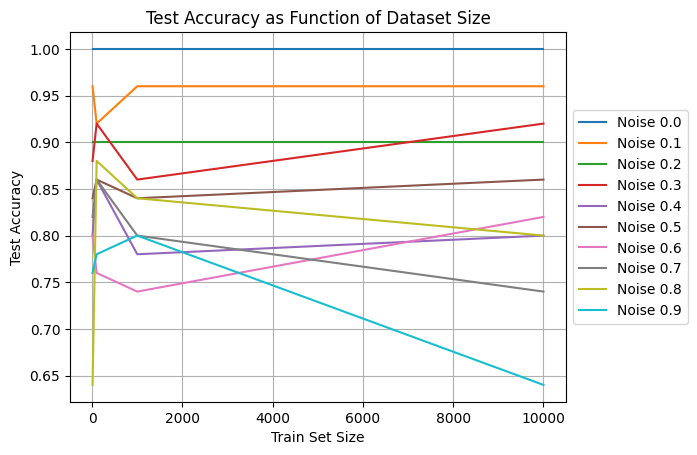

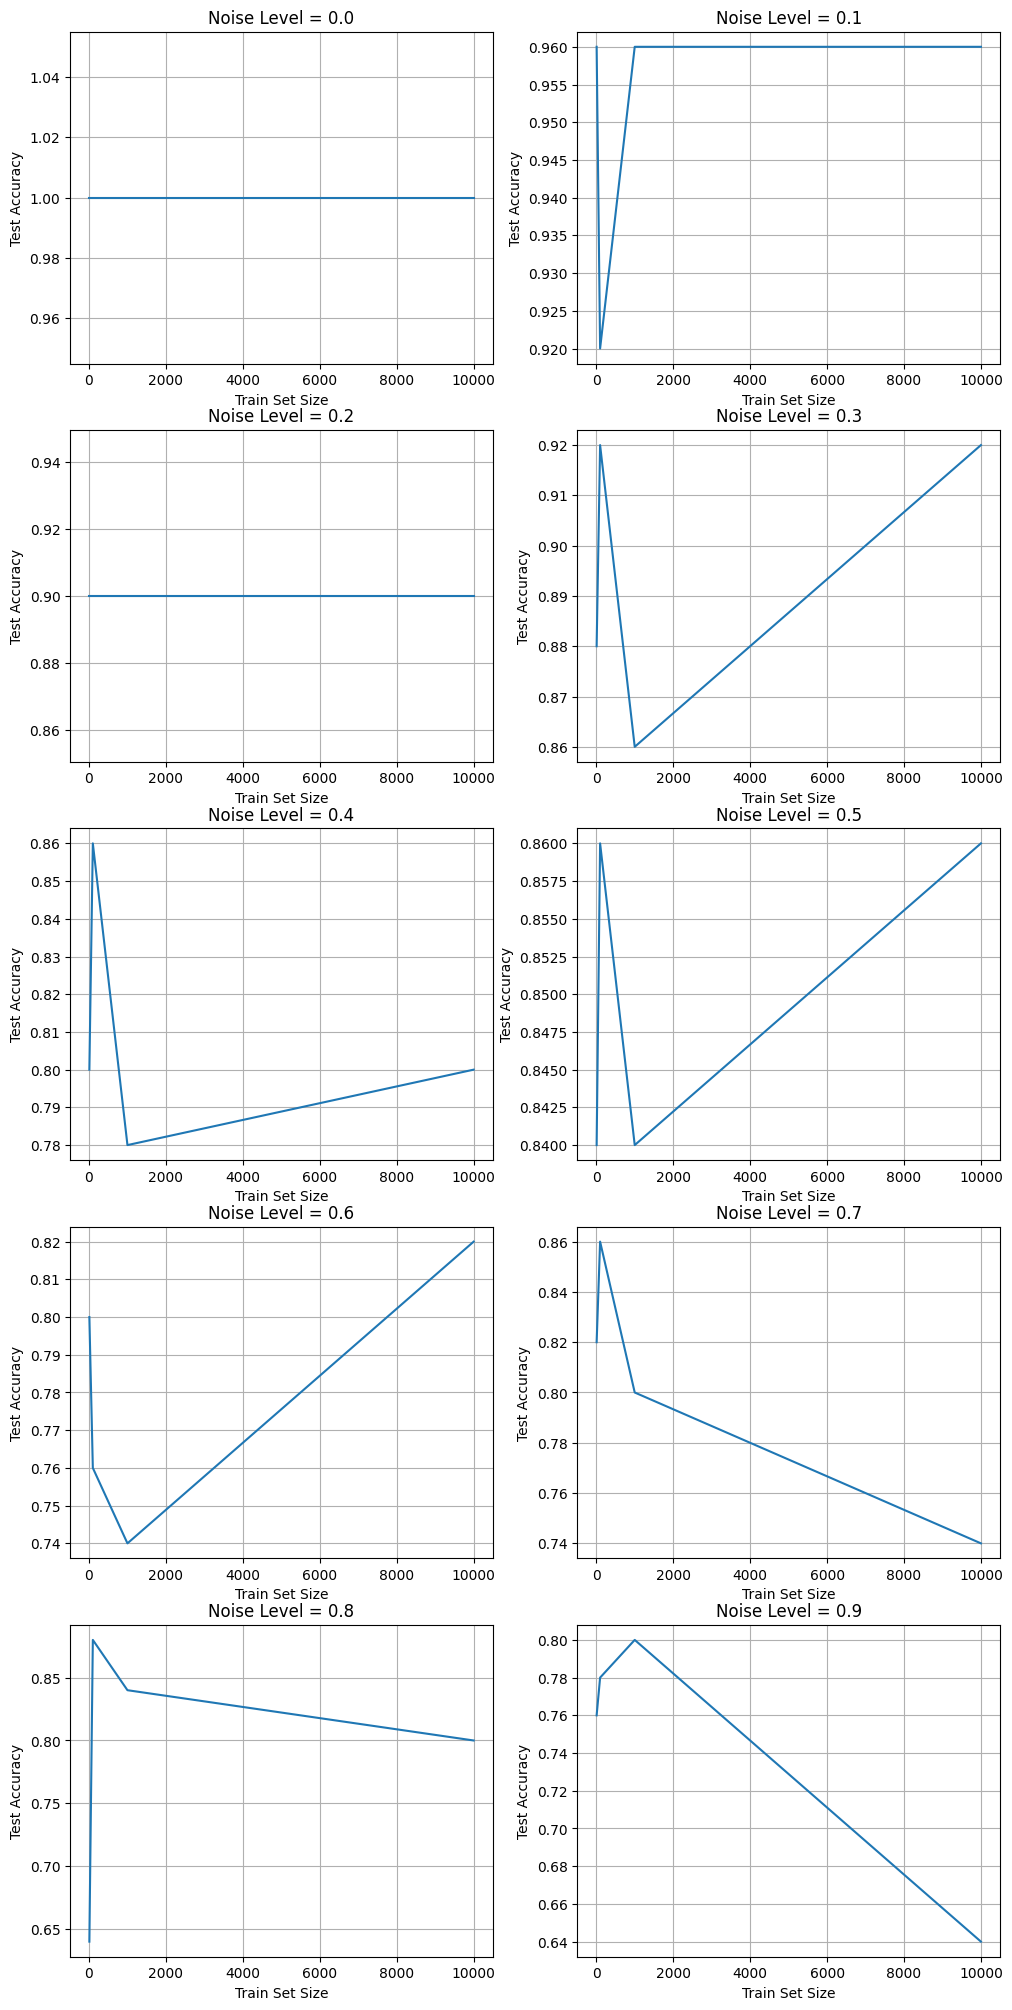

In [194]:
"""Plot relationship between test accuracy and training set size, by noise level."""

from matplotlib.pyplot  import figure, grid, legend, plot, subplot, title, xlabel, ylabel

# Initialize figure.
figure()

# For each noise level prescribed...
for i, noise_level in enumerate(noise_list, start = 1):
    
    # Plot data points.
    plot(
        n_train_samples_list, 
        [
            results["test_accuracy"]
            for results in experiment_config.values() 
            if results["noise"] == noise_level
        ],
        # marker =    "o",
        label =     f"Noise {noise_level}"
    )
    
    # Display grid.
    grid(visible = True)
    
    # Label axes.
    xlabel("Train Set Size")
    ylabel("Test Accuracy")
    
    # Set title.
    title(f"Test Accuracy as Function of Dataset Size")
    
    # Add legend.
    legend(loc = "center left", bbox_to_anchor = (1, 0.5))

# Initialize figure dimensions.
figure(figsize = (12, 25))

# For each noise level prescribed...
for i, noise_level in enumerate(noise_list, start = 1):

    # Set subplot location.
    subplot(5, 2, i)
    
    # Plot data points.
    plot(
        n_train_samples_list, 
        [
            results["test_accuracy"] 
            for results in experiment_config.values() 
            if results["noise"] == noise_level
        ]
    )
    
    # Display grid.
    grid(visible = True)
    
    # Label axes.
    xlabel("Train Set Size")
    ylabel("Test Accuracy")
    
    # Set title.
    title(f"Noise Level = {noise_level}")

## Relationship of Accuracy Gaps to Train Set Size

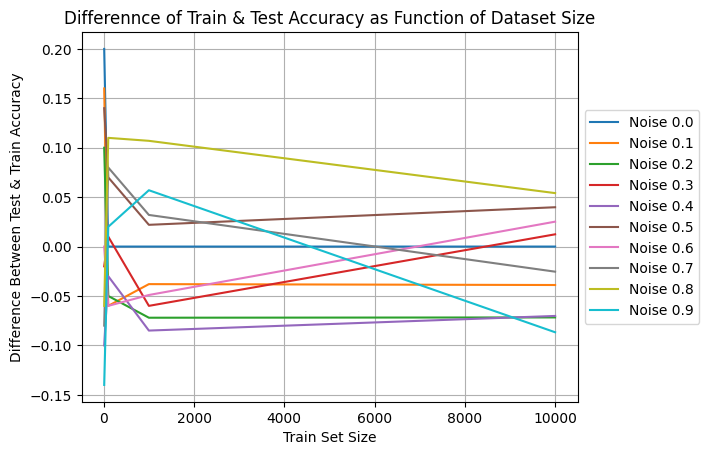

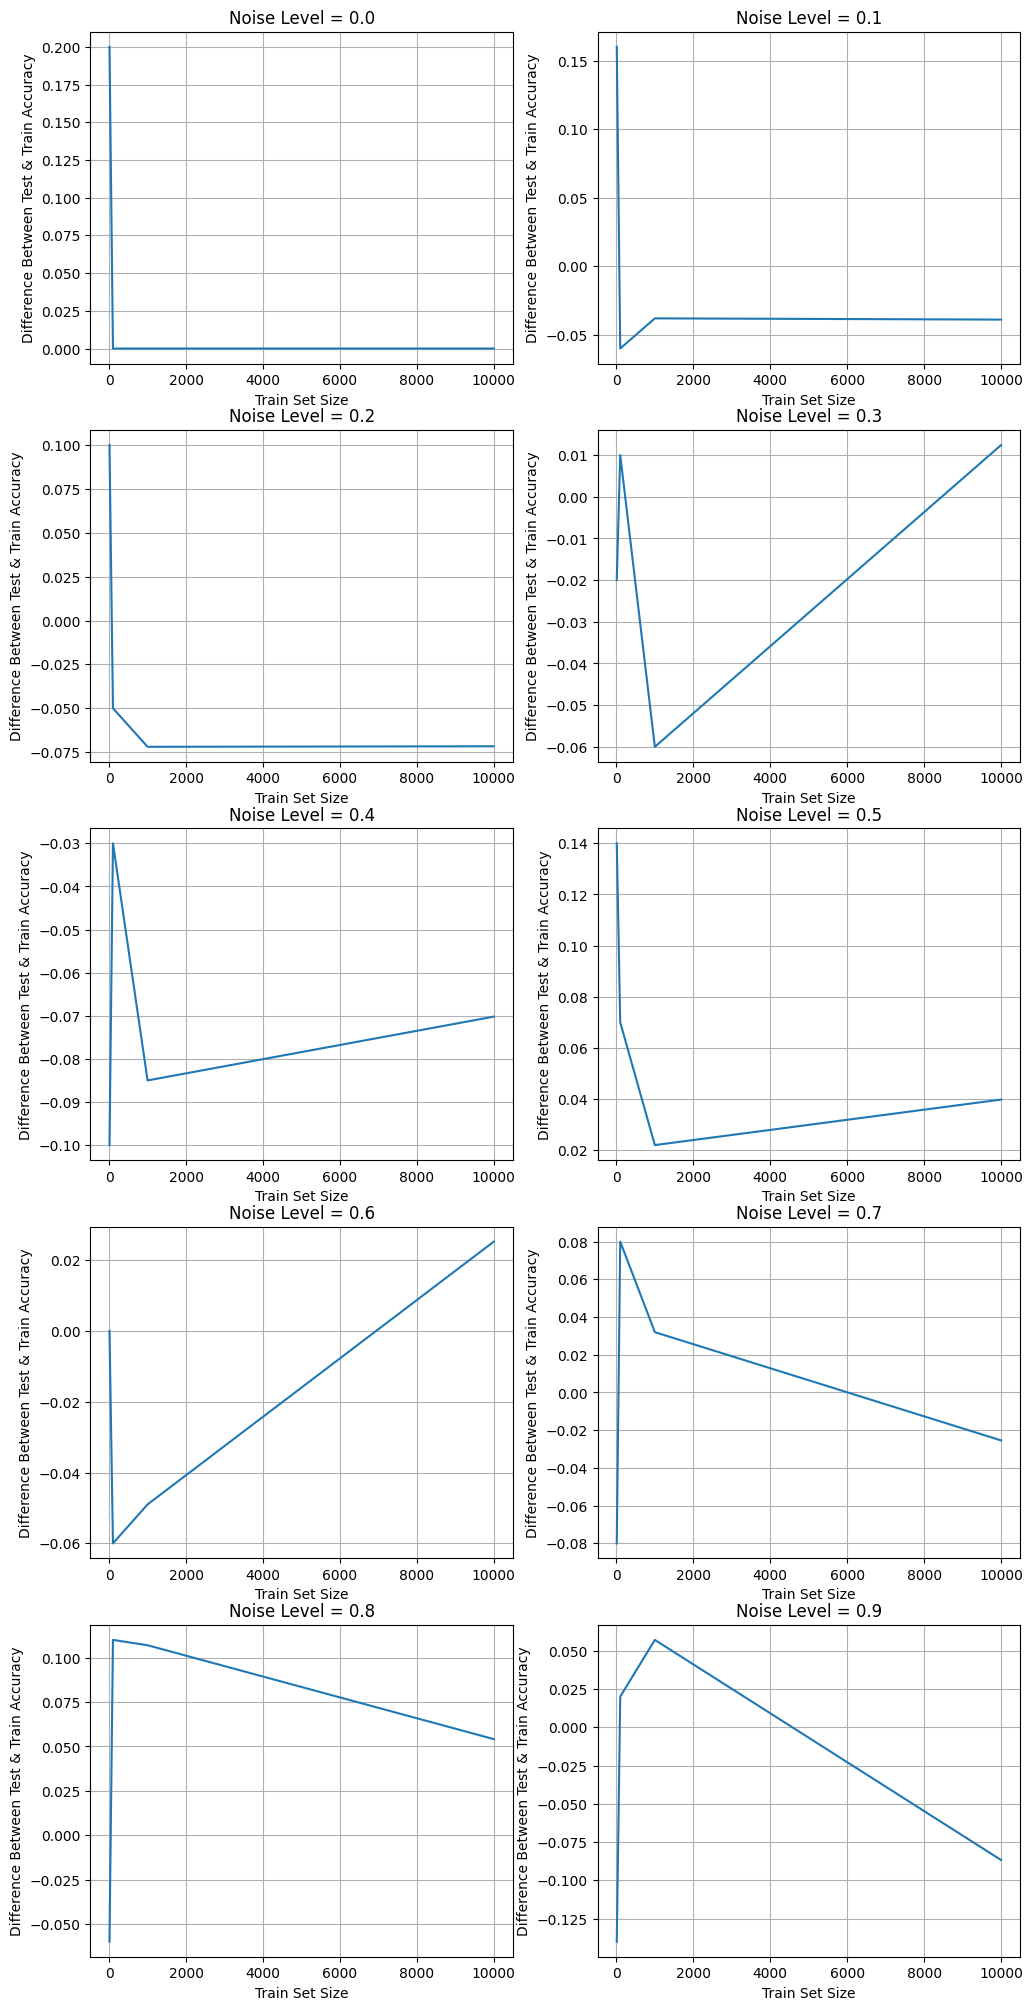

In [195]:
"""Plot relationship between accuracy gaps and training set size, by noise level."""

from matplotlib.pyplot  import figure, grid, legend, plot, subplot, title, xlabel, ylabel

# Initialize figure.
figure()

# For each noise level prescribed...
for i, noise_level in enumerate(noise_list, start = 1):
    
    # Plot data points.
    plot(
        n_train_samples_list, 
        [
            results["test_accuracy"] - results["train_accuracy"]
            for results in experiment_config.values() 
            if results["noise"] == noise_level
        ],
        # marker =    "o",
        label =     f"Noise {noise_level}"
    )
    
    # Display grid.
    grid(visible = True)
    
    # Label axes.
    xlabel("Train Set Size")
    ylabel("Difference Between Test & Train Accuracy")
    
    # Set title.
    title(f"Differennce of Train & Test Accuracy as Function of Dataset Size")
    
    # Add legend.
    legend(loc = "center left", bbox_to_anchor = (1, 0.5))

# Initialize figure dimensions.
figure(figsize = (12, 25))

# For each noise level prescribed...
for i, noise_level in enumerate(noise_list, start = 1):

    # Set subplot location.
    subplot(5, 2, i)
    
    # Plot data points.
    plot(
        n_train_samples_list, 
        [
            (results["test_accuracy"] - results["train_accuracy"])
            for results in experiment_config.values() 
            if results["noise"] == noise_level
        ]
    )
    
    # Display grid.
    grid(visible = True)
    
    # Label axes.
    xlabel("Train Set Size")
    ylabel("Difference Between Test & Train Accuracy")
    
    # Set title.
    title(f"Noise Level = {noise_level}")

---

## Pattern Recognition

In [196]:
"""Prepare feature vectors."""

from numpy                  import array, ndarray

# Initialize feature vectors. Samples will consist of tuples of noise level (Q) and test accuracy (P).
# Targets will be train set size (N).
X:      ndarray =           array([[experiment["noise"], experiment["test_accuracy"]] for experiment in experiment_config.values()])
Y:      ndarray =           array([experiment["n_samples_train"]                      for experiment in experiment_config.values()])

### Linear Regression

In [197]:
"""Determine linear pattern of experiment results."""

from sklearn.linear_model   import LinearRegression

# Initialize linear regression model.
model:      LinearRegression =  LinearRegression()

# Fit data to model.
model.fit(X = X, y = Y)

# Extract coefficients.
C_1, C_2 =                      model.coef_

# Extract inetercept.
intercept:  float =             model.intercept_

# Calculate R^2 score.
r_squared:  float =             model.score(X = X, y = Y)

# Log function.
print(f"Solution found: N = ({C_1:.2f})Q + ({C_2:.2f})P + {intercept:.2f}")
print(f"R² Score: {r_squared}")

Solution found: N = (-2228.34)Q + (-8764.64)P + 11252.11
R² Score: 0.01042918049442254


### Polynomial Regression

In [198]:
"""Determine non-linear pattern of experiment results."""

from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline       import make_pipeline, Pipeline
from sklearn.linear_model   import LinearRegression

# Initialize non-linear regression model.
model:          Pipeline =  make_pipeline(
                                PolynomialFeatures(degree = 2, include_bias = False),
                                LinearRegression()
                            )

# Fit data to model.
model.fit(X = X, y = Y)

# Calculate R^2 score.
r_squared:      float =     model.score(X = X, y = Y)

# Extract coefficients.
coefficients:   tuple =     model.named_steps["linearregression"].coef_

# Extract inetercept.
intercept:      float =     model.named_steps["linearregression"].intercept_

# Extract polynomial terms.
feature_names:  tuple =     model.named_steps['polynomialfeatures'].get_feature_names_out(["Q", "P"])

# Log function.
print(f"""N ≈ {" + ".join([f"({coef:.2f}){name}" for coef, name in zip(coefficients, feature_names)]) + f" + {intercept:.2f}"}""")
print(f"R² Score: {r_squared}")

N ≈ (175763.99)Q + (332037.03)P + (-34984.04)Q^2 + (-164384.94)Q P + (-146686.43)P^2 + -182056.43
R² Score: 0.06842676684231419


### Linear SVM

In [199]:
"""Determine linear patter with Linear SVM."""

from sklearn.svm        import LinearSVC

# Initialize non-linear regression model.
model:          LinearSVC = LinearSVC(C = 1)

# Fit data to model.
model.fit(X = X, y = Y)

# Extract coefficients.
C_1 =                      model.coef_[0]

# Extract inetercept.
intercept:  float =             model.intercept_

# Calculate R^2 score.
r_squared:  float =             model.score(X = X, y = Y)

# Log function.
print(f"Solution found: N = ({C_1[0]:.2f})Q + ({C_1[1]:.2f})P + {intercept[0]:.2f}")
print(f"R² Score: {r_squared}")

Solution found: N = (-0.10)Q + (-0.45)P + -0.07
R² Score: 0.325


### Non-Linear SVM

In [200]:
"""Determine non-linear patter with Non-Linear SVM."""

from sklearn.svm    import SVC

# Initialize non-linear regression model.
model:          SVC = SVC(C = 1)

# Fit data to model.
model.fit(X = X, y = Y)

# Extract coefficients.
C_1 =                      model.dual_coef_[0]

# Extract inetercept.
intercept:  float =             model.intercept_

# Calculate R^2 score.
r_squared:  float =             model.score(X = X, y = Y)

# Log function.
print(f"Solution found: N = ({C_1[0]:.2f})Q + ({C_1[1]:.2f})P + {intercept[0]:.2f}")
print(f"R² Score: {r_squared}")

Solution found: N = (1.00)Q + (1.00)P + -0.05
R² Score: 0.325
